In [1]:
import sys
sys.path.append("/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI")
from loadData import allData

=== ECONOMIC CATEGORIES ===
Distribution:
economic_category
0     1
1    25
2    50
3    54
4    63
Name: count, dtype: int64
Uncategorized countries: 1

=== GEOGRAPHICAL CATEGORIES ===
Distribution:
geographical_category
0     1
1     8
2    52
3    20
4    47
5    33
6    30
7     2
Name: count, dtype: int64
Uncategorized countries: 1

=== EDUCATIONAL CATEGORIES ===
Distribution:
educational_category
0     1
1    28
2    74
3    90
Name: count, dtype: int64
Uncategorized countries: 1

=== OVERLAP CHECKS ===
Countries in multiple economic categories: 0
Countries in multiple geographical categories: 0
Countries in multiple educational categories: 0

=== SAMPLE DATA ===
               country  economic_category  geographical_category  \
0          Afghanistan                  1                      1   
1              Albania                  3                      2   
2              Algeria                  3                      3   
3              Andorra                  4         

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import math

allData.head()

,country,text,answer,word_count,avg_word_length,sentence_count,avg_sentence_length,sentiment_polarity,flesch_reading_ease,personal,...,Membership Document Symbol,grammatical_analysis,academic,vocational,userConsiderations,background,international,economic_category,geographical_category,educational_category
0,Afghanistan,Uddannelsesmuligheder i Danmark\nI'm a 16 year...,\nThank you for sharing your background — that...,447.2,4.94,31.0,15.06,0.191873,48.022778,0.6,...,A/RES/34 (I),889.0,19.2,9.8,12.4,6.0,0.2,1,1,1
1,Albania,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,449.2,5.00,34.0,13.38,0.199854,46.045864,0.6,...,A/RES/995 (X),873.8,24.4,10.6,12.6,6.4,0.4,3,2,3
2,Algeria,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,470.6,4.92,31.2,15.60,0.207120,48.005737,1.2,...,A/RES/1754 (XVII),912.2,21.2,11.2,12.0,6.2,0.2,3,3,2
3,Andorra,Uddannelsesvalg efter folkeskolen\nI'm a 16 ye...,\nThank you for sharing a bit about yourself —...,438.6,5.04,30.0,14.82,0.182773,44.261592,0.4,...,A/RES/47/232,868.0,21.0,8.6,12.0,7.6,0.8,4,2,3
4,Angola,Uddannelsesvalg efter folkeskole\nI'm a 16 yea...,\nThanks for sharing — you're in a very import...,426.6,4.92,32.6,13.36,0.197741,49.292963,0.8,...,A/RES/31/44,843.2,22.8,13.8,10.6,5.8,0.0,2,4,2


In [38]:
numericColumns = allData.select_dtypes(include=[np.number]) # Selecting only numeric columns
numericColumns = numericColumns.drop(columns=['educational_category', 'economic_category', 'geographical_category'])
numericColumns.describe()

,word_count,avg_word_length,sentence_count,avg_sentence_length,sentiment_polarity,flesch_reading_ease,personal,tailor,10,!,grammatical_analysis,academic,vocational,userConsiderations,background,international
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,465.116062,4.989430,34.695337,13.858653,0.204789,47.273237,0.710881,0.331606,1.124352,0.659067,917.673575,22.103627,10.372021,11.769948,6.837306,0.488083
std,21.829476,0.074219,2.910546,1.085801,0.016801,2.793389,0.373519,0.244706,0.687597,0.334840,39.077314,2.123391,1.499112,1.469881,0.944423,0.682148
min,410.400000,4.800000,28.400000,10.460000,0.148648,37.873928,0.000000,0.000000,0.000000,0.000000,832.600000,17.000000,6.200000,7.600000,4.800000,0.000000
25%,450.400000,4.940000,33.000000,13.120000,0.192222,45.363553,0.400000,0.200000,0.600000,0.400000,890.800000,20.600000,9.400000,10.800000,6.200000,0.000000
50%,464.200000,5.000000,34.600000,13.700000,0.205959,47.631626,0.600000,0.400000,1.000000,0.600000,914.000000,21.800000,10.400000,11.800000,6.800000,0.200000
75%,481.400000,5.040000,36.600000,14.560000,0.216060,49.186663,1.000000,0.400000,1.600000,0.800000,943.400000,23.400000,11.200000,12.600000,7.400000,0.600000
max,521.800000,5.180000,48.200000,17.660000,0.258888,53.139293,1.800000,1.200000,3.400000,1.800000,1020.000000,29.000000,14.600000,17.000000,10.200000,3.400000


In [31]:
# Function to check for missing and corrupted data (Generated by ChatGPT)
def check_data_quality(numericColumns):
    print("\n--- Data Quality Check ---")
    
    # Check for missing values in each column
    missing_values = numericColumns.isnull().sum()
    print("Missing values per column:")
    print(missing_values)
    
    # Total number of missing values
    total_missing = missing_values.sum()
    print(f"\nTotal missing values: {total_missing}")

check_data_quality(numericColumns)


--- Data Quality Check ---
Missing values per column:
word_count               0
avg_word_length          0
sentence_count           0
avg_sentence_length      0
sentiment_polarity       0
flesch_reading_ease      0
personal                 0
tailor                   0
10                       0
!                        0
grammatical_analysis     0
academic                 0
vocational               0
userConsiderations       0
background               0
international            0
economic_category        0
geographical_category    0
educational_category     0
dtype: int64

Total missing values: 0


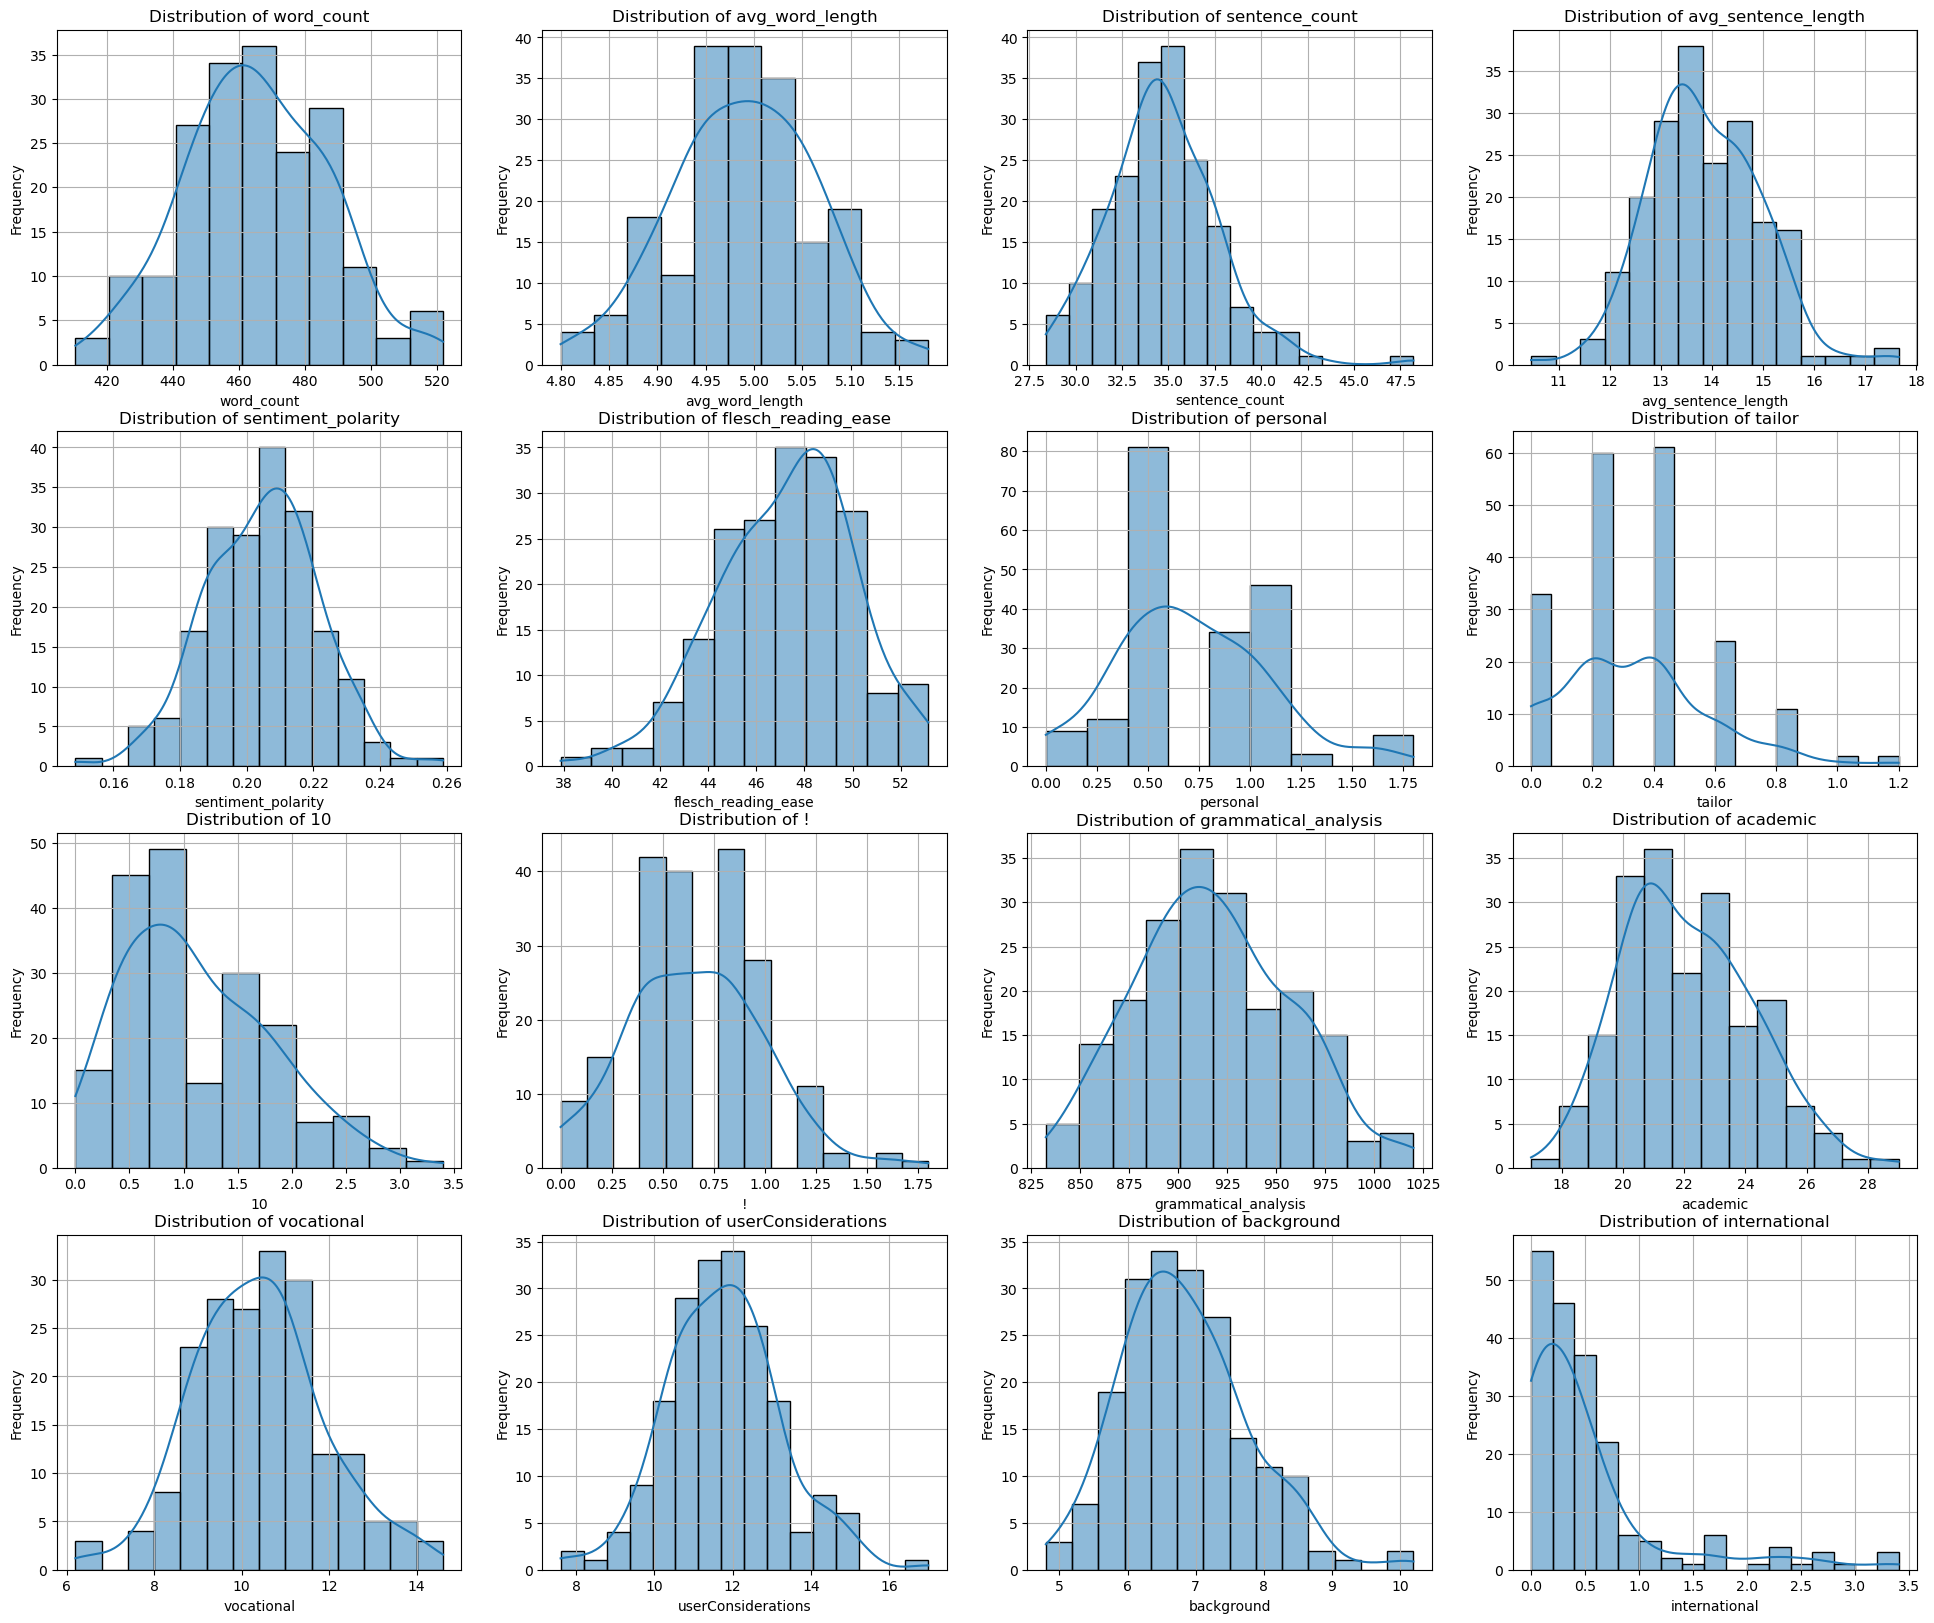

In [ ]:
# Choose number of columns and rows for the subplot grid
n_cols = 4
n_plots = len(numericColumns.columns)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()
# Plotting histograms for each numeric column to visualize their distributions and check for normality.

for i, column in enumerate(numericColumns.columns):
    sns.histplot(numericColumns[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

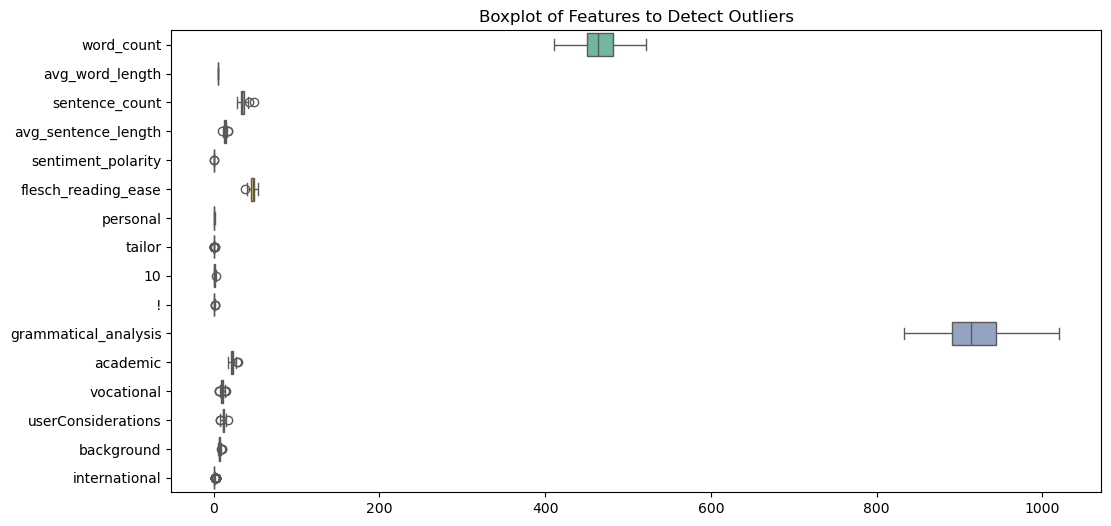

In [35]:
# Box plots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numericColumns, orient='h', palette='Set2')
plt.title('Boxplot of Features to Detect Outliers')
plt.show()

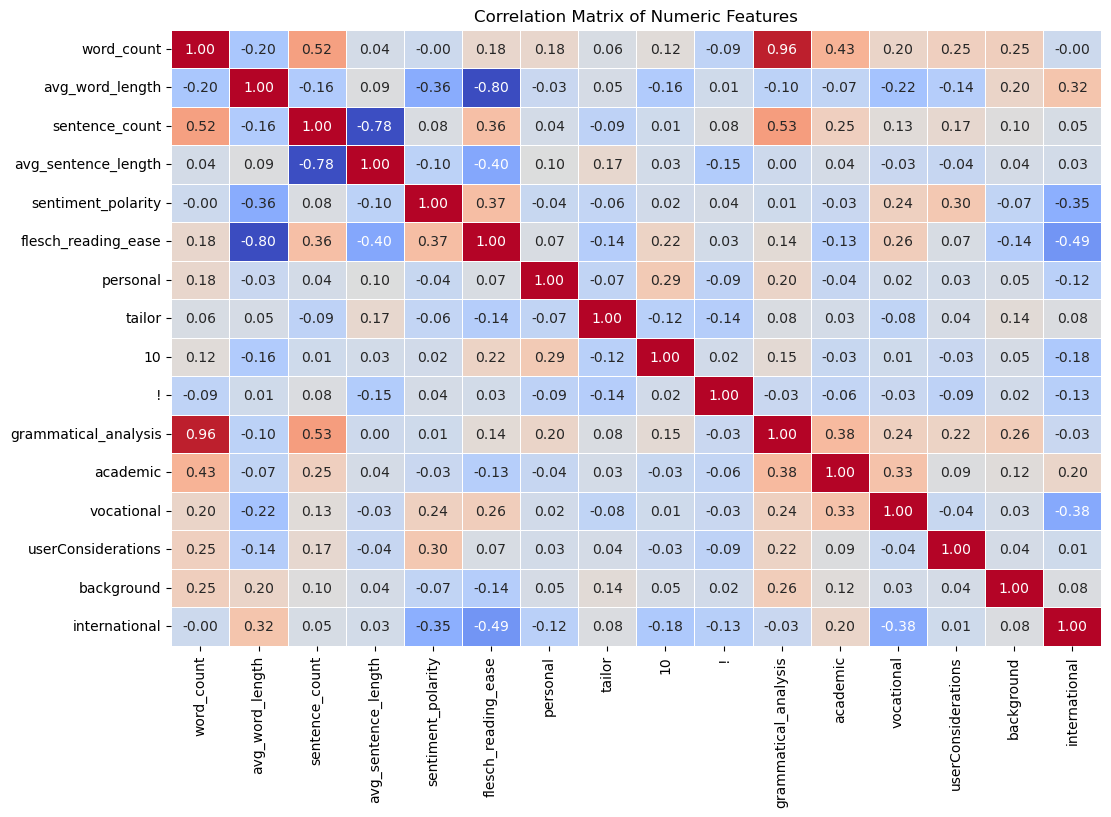

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = numericColumns.corr()

# Plot the correlation matrix as a heatmap to visualize relationships between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=False)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

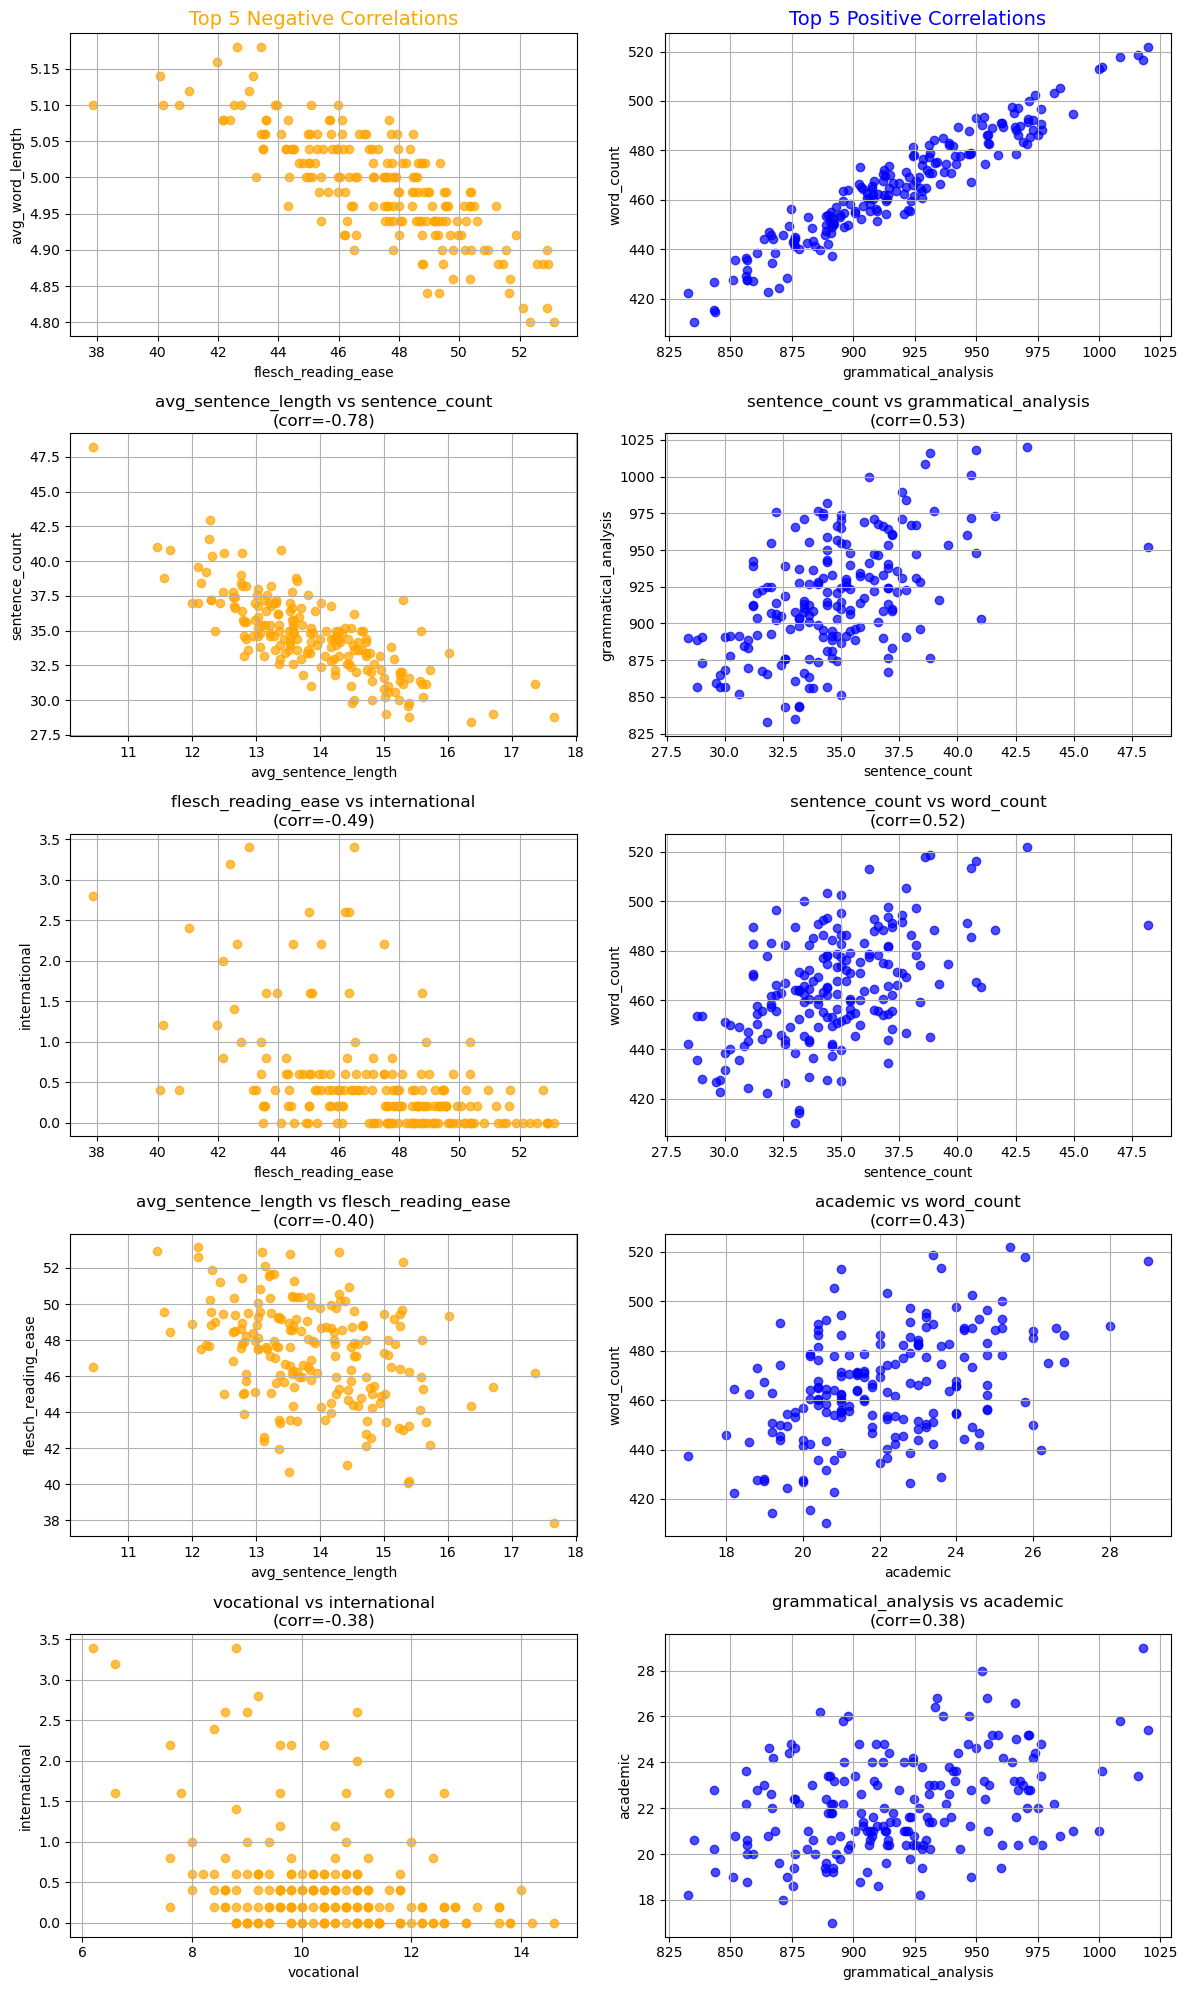

In [ ]:
# Compute correlation matrix and flatten, excluding self-correlation
corr_matrix = numericColumns.corr()
corr_unstacked = corr_matrix.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]

# Remove duplicate pairs (since corr(A,B) == corr(B,A))
corr_unstacked = corr_unstacked.groupby([frozenset(pair) for pair in corr_unstacked.index]).first()

# Get top 5 positive and top 5 negative correlations
top5_pos = corr_unstacked.sort_values(ascending=False).head(5)
top5_neg = corr_unstacked.sort_values().head(5)

# Plot: negatives on the left, positives on the right
n_rows = 5
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20))

# Plot negative correlations (left column)
for i, pair in enumerate(top5_neg.index):
    col1, col2 = tuple(pair)
    axes[i, 0].scatter(numericColumns[col1], numericColumns[col2], alpha=0.7, color='orange')
    axes[i, 0].set_title(f"{col1} vs {col2}\n(corr={corr_unstacked[pair]:.2f})")
    axes[i, 0].set_xlabel(col1)
    axes[i, 0].set_ylabel(col2)
    axes[i, 0].grid()

# Plot positive correlations (right column)
for i, pair in enumerate(top5_pos.index):
    col1, col2 = tuple(pair)
    axes[i, 1].scatter(numericColumns[col1], numericColumns[col2], alpha=0.7, color='blue')
    axes[i, 1].set_title(f"{col1} vs {col2}\n(corr={corr_unstacked[pair]:.2f})")
    axes[i, 1].set_xlabel(col1)
    axes[i, 1].set_ylabel(col2)
    axes[i, 1].grid()

# Set column titles
axes[0, 0].set_title("Top 5 Negative Correlations", fontsize=14, color='orange')
axes[0, 1].set_title("Top 5 Positive Correlations", fontsize=14, color='blue')

plt.tight_layout()